[*********************100%%**********************]  1 of 1 completed


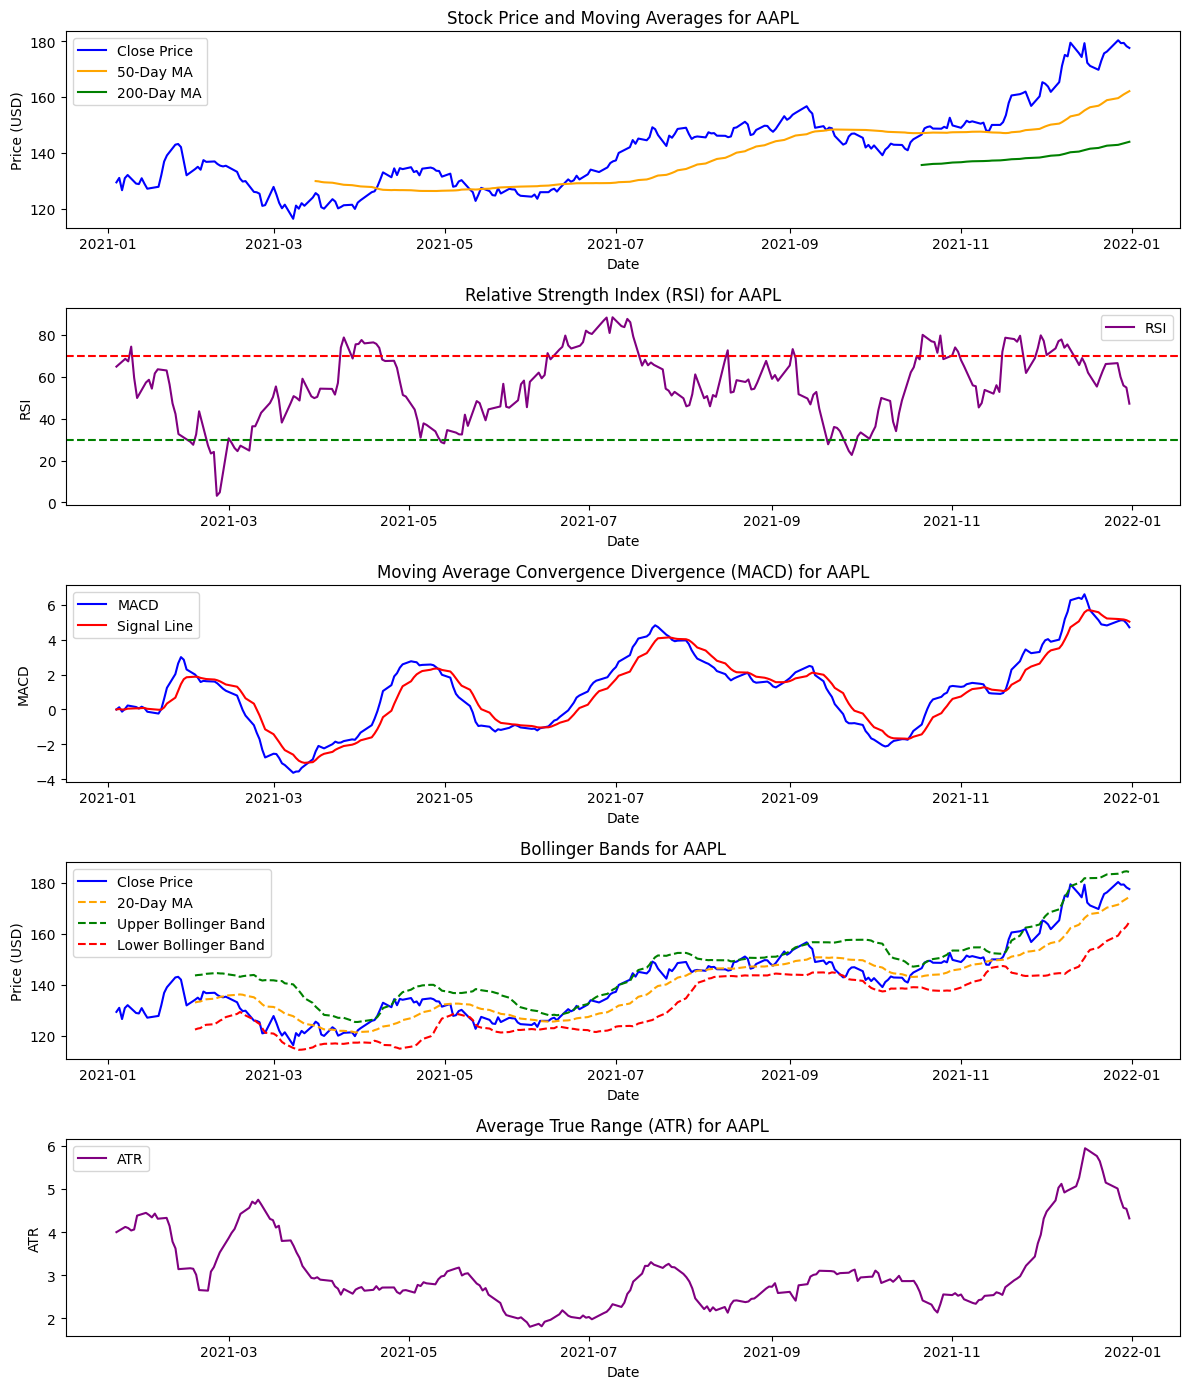

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetch historical stock price data for a given ticker symbol.

    Args:
    - ticker: Stock ticker symbol (e.g., 'AAPL' for Apple Inc.).
    - start_date: Start date for historical data (YYYY-MM-DD).
    - end_date: End date for historical data (YYYY-MM-DD).

    Returns:
    - pandas DataFrame containing historical stock price data.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_technical_indicators(stock_data):
    """
    Calculate technical indicators such as Moving Average (MA), Relative Strength Index (RSI),
    Moving Average Convergence Divergence (MACD), Bollinger Bands, Average True Range (ATR),
    Stochastic Oscillator, Money Flow Index (MFI), and On-Balance Volume (OBV).

    Args:
    - stock_data: pandas DataFrame containing historical stock price data.

    Returns:
    - pandas DataFrame containing stock data with technical indicators added.
    """
    # Calculate Moving Average (MA)
    stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

    # Calculate Relative Strength Index (RSI)
    delta = stock_data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    RS = gain / loss
    stock_data['RSI'] = 100 - (100 / (1 + RS))

    # Calculate Moving Average Convergence Divergence (MACD)
    exp1 = stock_data['Close'].ewm(span=12, adjust=False).mean()
    exp2 = stock_data['Close'].ewm(span=26, adjust=False).mean()
    stock_data['MACD'] = exp1 - exp2
    stock_data['Signal Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['BB_upper'] = stock_data['MA_20'] + 2 * stock_data['Close'].rolling(window=20).std()
    stock_data['BB_lower'] = stock_data['MA_20'] - 2 * stock_data['Close'].rolling(window=20).std()

    # Calculate Average True Range (ATR)
    stock_data['H-L'] = abs(stock_data['High'] - stock_data['Low'])
    stock_data['H-PC'] = abs(stock_data['High'] - stock_data['Close'].shift(1))
    stock_data['L-PC'] = abs(stock_data['Low'] - stock_data['Close'].shift(1))
    stock_data['TR'] = stock_data[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    stock_data['ATR'] = stock_data['TR'].rolling(window=14).mean()

    # Calculate Stochastic Oscillator
    stock_data['14-high'] = stock_data['High'].rolling(window=14).max()
    stock_data['14-low'] = stock_data['Low'].rolling(window=14).min()
    stock_data['%K'] = 100 * ((stock_data['Close'] - stock_data['14-low']) / (stock_data['14-high'] - stock_data['14-low']))
    stock_data['%D'] = stock_data['%K'].rolling(window=3).mean()

    # Calculate Money Flow Index (MFI)
    typical_price = (stock_data['High'] + stock_data['Low'] + stock_data['Close']) / 3
    raw_money_flow = typical_price * stock_data['Volume']
    money_flow_ratio = (raw_money_flow.diff(1) > 0).astype(int)
    money_flow_index = 100 - (100 / (1 + (money_flow_ratio.rolling(window=14).sum() / (14 / 100))))
    stock_data['MFI'] = money_flow_index

    # Calculate On-Balance Volume (OBV)
    obv = np.where(stock_data['Close'] > stock_data['Close'].shift(1), stock_data['Volume'],
                   np.where(stock_data['Close'] < stock_data['Close'].shift(1), -stock_data['Volume'], 0))
    stock_data['OBV'] = obv.cumsum()

    return stock_data

def plot_technical_indicators(stock_data, ticker):
    """
    Plot historical stock prices along with technical indicators.

    Args:
    - stock_data: pandas DataFrame containing stock data with technical indicators added.
    - ticker: Stock ticker symbol (for labeling the plot).
    """
    plt.figure(figsize=(12, 14))

    # Plotting closing prices
    plt.subplot(5, 1, 1)
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, stock_data['MA_50'], label='50-Day MA', color='orange')
    plt.plot(stock_data.index, stock_data['MA_200'], label='200-Day MA', color='green')
    plt.title('Stock Price and Moving Averages for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    # Plotting RSI
    plt.subplot(5, 1, 2)
    plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title('Relative Strength Index (RSI) for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()

    # Plotting MACD
    plt.subplot(5, 1, 3)
    plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='blue')
    plt.plot(stock_data.index, stock_data['Signal Line'], label='Signal Line', color='red')
    plt.title('Moving Average Convergence Divergence (MACD) for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()

    # Plotting Bollinger Bands
    plt.subplot(5, 1, 4)
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, stock_data['MA_20'], label='20-Day MA', color='orange', linestyle='--')
    plt.plot(stock_data.index, stock_data['BB_upper'], label='Upper Bollinger Band', color='green', linestyle='--')
    plt.plot(stock_data.index, stock_data['BB_lower'], label='Lower Bollinger Band', color='red', linestyle='--')
    plt.title('Bollinger Bands for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    # Plotting ATR
    plt.subplot(5, 1, 5)
    plt.plot(stock_data.index, stock_data['ATR'], label='ATR', color='purple')
    plt.title('Average True Range (ATR) for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('ATR')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Input parameters
    ticker_symbol = 'AAPL'  # Example: Apple Inc.
    start_date = '2021-01-01'
    end_date = '2022-01-01'

    # Fetch historical stock price data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

    # Calculate technical indicators
    stock_data_with_indicators = calculate_technical_indicators(stock_data)

    # Plot historical stock prices along with technical indicators
    plot_technical_indicators(stock_data_with_indicators, ticker_symbol)


[*********************100%%**********************]  1 of 1 completed


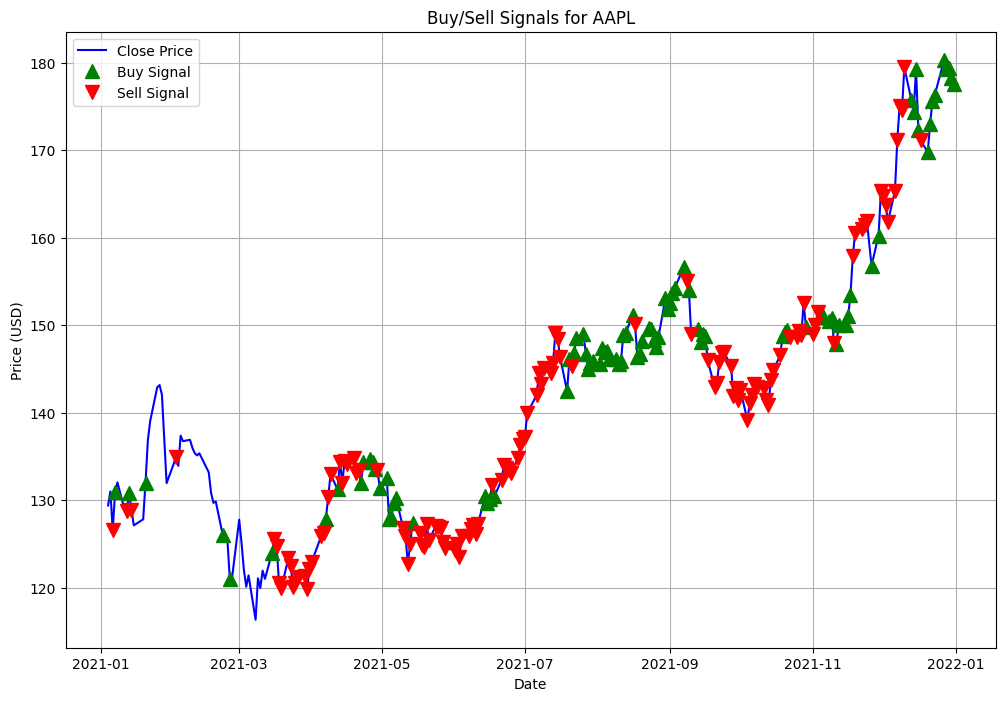

In [ ]:
def generate_signals(stock_data):
    """
    Generate buy and sell signals based on technical indicators.

    Args:
    - stock_data: pandas DataFrame containing stock data with technical indicators added.

    Returns:
    - pandas DataFrame containing stock data with buy/sell signals added.
    """
    signals = pd.DataFrame(index=stock_data.index)
    signals['Signal'] = 0.0  # 0: No signal, 1: Buy signal, -1: Sell signal

    # Generating buy signals
    signals['Signal'][stock_data['Close'] > stock_data['MA_50']] = 1
    signals['Signal'][(stock_data['Close'] < stock_data['MA_50']) & (stock_data['RSI'] < 30)] = 1
    signals['Signal'][(stock_data['MACD'] > stock_data['Signal Line']) & (stock_data['MACD'].shift(1) < stock_data['Signal Line'].shift(1))] = 1
    signals['Signal'][(stock_data['Close'] < stock_data['BB_lower']) & (stock_data['RSI'] < 30)] = 1
    signals['Signal'][stock_data['Close'] > (stock_data['Close'] + 2 * stock_data['ATR'])] = 1

    # Generating sell signals
    signals['Signal'][stock_data['Close'] < stock_data['MA_50']] = -1
    signals['Signal'][(stock_data['Close'] > stock_data['MA_50']) & (stock_data['RSI'] > 70)] = -1
    signals['Signal'][(stock_data['MACD'] < stock_data['Signal Line']) & (stock_data['MACD'].shift(1) > stock_data['Signal Line'].shift(1))] = -1
    signals['Signal'][(stock_data['Close'] > stock_data['BB_upper']) & (stock_data['RSI'] > 70)] = -1
    signals['Signal'][stock_data['Close'] < (stock_data['Close'] - 2 * stock_data['ATR'])] = -1

    return signals


def plot_signals(stock_data, signals, ticker):
    """
    Plot stock prices along with buy and sell signals.

    Args:
    - stock_data: pandas DataFrame containing stock data.
    - signals: pandas DataFrame containing buy/sell signals.
    - ticker: Stock ticker symbol (for labeling the plot).
    """
    plt.figure(figsize=(12, 8))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.loc[signals['Signal'] == 1].index, stock_data['Close'][signals['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(stock_data.loc[signals['Signal'] == -1].index, stock_data['Close'][signals['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
    plt.title('Buy/Sell Signals for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Input parameters
    ticker_symbol = 'AAPL'  # Example: Apple Inc.
    start_date = '2021-01-01'
    end_date = '2022-01-01'

    # Fetch historical stock price data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

    # Calculate technical indicators
    stock_data_with_indicators = calculate_technical_indicators(stock_data)

    # Generate buy/sell signals
    signals = generate_signals(stock_data_with_indicators)

    # Plot buy/sell signals
    plot_signals(stock_data, signals, ticker_symbol)


Benchmark Returns: The benchmark returns are calculated as the percentage change in the closing price of the stock from one day to the next. This represents the return an investor would achieve by simply holding the stock over the entire period.

[*********************100%%**********************]  1 of 1 completed


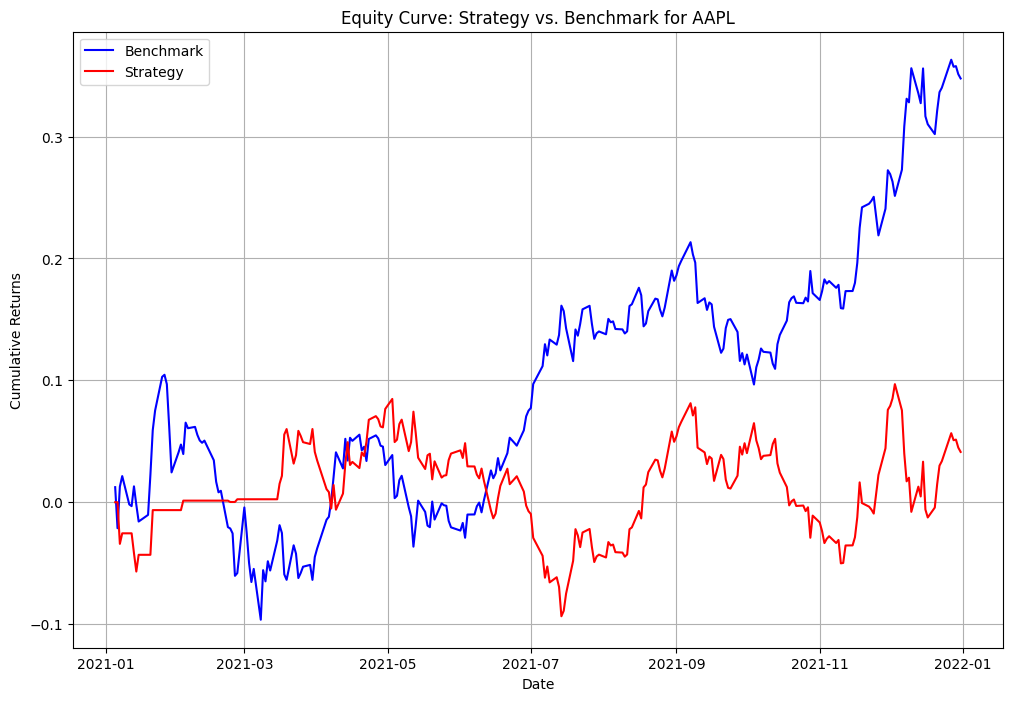

In [ ]:
def backtest_strategy(stock_data, signals):
    """
    Backtest the trading strategy against a benchmark.

    Args:
    - stock_data: pandas DataFrame containing stock data.
    - signals: pandas DataFrame containing buy/sell signals.

    Returns:
    - pandas DataFrame containing the backtest results.
    """
    backtest = pd.DataFrame(index=stock_data.index)
    backtest['Position'] = signals['Signal']
    backtest['Close'] = stock_data['Close']
    backtest['Returns'] = backtest['Close'].pct_change()
    backtest['Strategy'] = backtest['Position'].shift(1) * backtest['Returns']
    backtest['Benchmark'] = backtest['Returns'].cumsum()
    backtest['Strategy'] = backtest['Strategy'].cumsum()
    return backtest

def plot_equity_curve(backtest_results, ticker):
    """
    Plot the equity curve of the trading strategy.

    Args:
    - backtest_results: pandas DataFrame containing backtest results.
    - ticker: Stock ticker symbol (for labeling the plot).
    """
    plt.figure(figsize=(12, 8))
    plt.plot(backtest_results.index, backtest_results['Benchmark'], label='Benchmark', color='blue')
    plt.plot(backtest_results.index, backtest_results['Strategy'], label='Strategy', color='red')
    plt.title('Equity Curve: Strategy vs. Benchmark for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Input parameters
    ticker_symbol = 'AAPL'  # Example: Apple Inc.
    start_date = '2021-01-01'
    end_date = '2022-01-01'

    # Fetch historical stock price data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

    # Calculate technical indicators
    stock_data_with_indicators = calculate_technical_indicators(stock_data)

    # Generate buy/sell signals
    signals = generate_signals(stock_data_with_indicators)

    # Backtest the trading strategy
    backtest_results = backtest_strategy(stock_data, signals)

    # Plot equity curve
    plot_equity_curve(backtest_results, ticker_symbol)


[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
7/7 [==============================] - 4s 45ms/step - loss: 0.0856
Epoch 2/50
7/7 [==============================] - 0s 42ms/step - loss: 0.0180
Epoch 3/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0142
Epoch 4/50
7/7 [==============================] - 0s 41ms/step - loss: 0.0063
Epoch 5/50
7/7 [==============================] - 0s 68ms/step - loss: 0.0063
Epoch 6/50
7/7 [==============================] - 0s 69ms/step - loss: 0.0057
Epoch 7/50
7/7 [==============================] - 0s 69ms/step - loss: 0.0042
Epoch 8/50
7/7 [==============================] - 0s 66ms/step - loss: 0.0041
Epoch 9/50
7/7 [==============================] - 0s 72ms/step - loss: 0.0040
Epoch 10/50
7/7 [==============================] - 0s 70ms/step - loss: 0.0038
Epoch 11/50
7/7 [==============================] - 0s 41ms/step - loss: 0.0038
Epoch 12/50
7/7 [==============================] - 0s 41ms/step - loss: 0.0036
Epoch 13/50
7/7 [==============================] - 0s 41ms/st

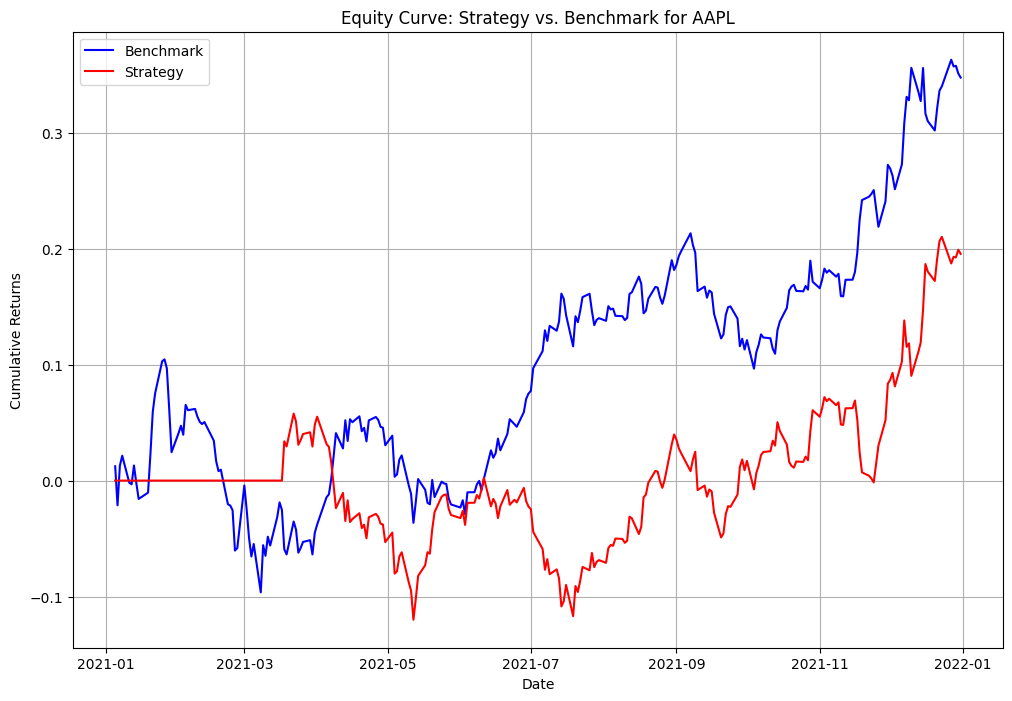

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

def prepare_data(stock_data, sequence_length):
    """
    Prepare data for training LSTM model.

    Args:
    - stock_data: pandas DataFrame containing historical stock price data.
    - sequence_length: Length of sequences to be used for training.

    Returns:
    - X_train: numpy array containing input sequences.
    - y_train: numpy array containing target values.
    """
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

    X_train, y_train = [], []
    for i in range(sequence_length, len(stock_data)):
        X_train.append(scaled_data[i - sequence_length:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    return X_train, y_train

def build_lstm_model(input_shape):
    """
    Build and compile LSTM model.

    Args:
    - input_shape: Tuple specifying input shape for the model.

    Returns:
    - LSTM model.
    """
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        LSTM(units=50, return_sequences=False),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

def train_lstm_model(X_train, y_train, epochs=50, batch_size=32):
    """
    Train LSTM model.

    Args:
    - X_train: numpy array containing input sequences.
    - y_train: numpy array containing target values.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training.

    Returns:
    - Trained LSTM model.
    """
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

def predict_price_movement(model, data):
    """
    Predict price movement using trained LSTM model.

    Args:
    - model: Trained LSTM model.
    - data: numpy array containing input data.

    Returns:
    - Predicted price movement.
    """
    return model.predict(data)

def generate_lstm_signals(stock_data, model, sequence_length):
    """
    Generate buy and sell signals using LSTM predictions.

    Args:
    - stock_data: pandas DataFrame containing historical stock price data.
    - model: Trained LSTM model.
    - sequence_length: Length of sequences used for training.

    Returns:
    - pandas DataFrame containing buy/sell signals.
    """
    signals = pd.DataFrame(index=stock_data.index)
    signals['Signal'] = 0.0  # 0: No signal, 1: Buy signal, -1: Sell signal

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

    for i in range(sequence_length, len(stock_data)):
        sequence = scaled_data[i - sequence_length:i, 0].reshape(1, -1, 1)
        prediction = predict_price_movement(model, sequence)
        current_price = scaled_data[i, 0]
        if prediction > current_price:
            signals.loc[stock_data.index[i], 'Signal'] = 1
        elif prediction < current_price:
            signals.loc[stock_data.index[i], 'Signal'] = -1

    return signals

if __name__ == "__main__":
    # Input parameters
    ticker_symbol = 'AAPL'  # Example: Apple Inc.
    start_date = '2021-01-01'
    end_date = '2022-01-01'
    sequence_length = 50  # Length of sequences for LSTM model

    # Fetch historical stock price data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

    # Prepare data for LSTM model
    X_train, y_train = prepare_data(stock_data, sequence_length)

    # Train LSTM model
    lstm_model = train_lstm_model(X_train, y_train)

    # Generate buy/sell signals using LSTM predictions
    lstm_signals = generate_lstm_signals(stock_data, lstm_model, sequence_length)

    # Backtest the trading strategy
    lstm_backtest_results = backtest_strategy(stock_data, lstm_signals)

    # Plot equity curves for LSTM-based strategy and benchmark
    plot_equity_curve(lstm_backtest_results, ticker_symbol)


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def fetch_stock_data(ticker_symbol, start_date, end_date):
    stock = yf.Ticker(ticker_symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

def calculate_momentum(data):
    data['momentum'] = data['Close'].pct_change()
    return data

def plot_momentum_strategy(data):
    figure = make_subplots(rows=2, cols=1)
    figure.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close Price'), row=1, col=1)
    figure.add_trace(go.Scatter(x=data.index, y=data['momentum'], name='Momentum', yaxis='y2'), row=2, col=1)

    # Adding the buy and sell signals
    figure.add_trace(go.Scatter(x=data.loc[data['momentum'] > 0].index,
                                 y=data.loc[data['momentum'] > 0]['Close'],
                                 mode='markers', name='Buy',
                                 marker=dict(color='green', symbol='triangle-up')), row=1, col=1)

    figure.add_trace(go.Scatter(x=data.loc[data['momentum'] < 0].index,
                                 y=data.loc[data['momentum'] < 0]['Close'],
                                 mode='markers', name='Sell',
                                 marker=dict(color='red', symbol='triangle-down')), row=1, col=1)

    figure.update_layout(title='Algorithmic Trading using Momentum Strategy',
                         xaxis_title='Date',
                         yaxis_title='Price')
    figure.update_yaxes(title="Momentum", secondary_y=True)
    figure.show()

# Fetching data for AAPL
start_date = '2021-01-01'
end_date = '2022-01-01'
ticker_symbol = 'AAPL'
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

# Calculating momentum
stock_data = calculate_momentum(stock_data)

# Plotting momentum strategy
plot_momentum_strategy(stock_data)


[*********************100%%**********************]  1 of 1 completed


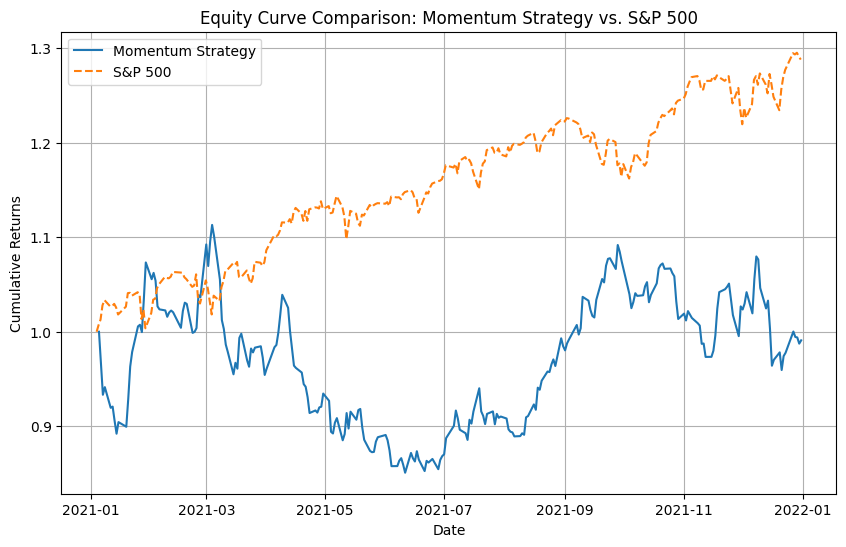

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_stock_data(ticker_symbol, start_date, end_date):
    stock = yf.Ticker(ticker_symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

def calculate_momentum(data):
    data['momentum'] = data['Close'].pct_change()
    return data

def calculate_equity_curve(data):
    data['position'] = np.where(data['momentum'] > 0, 1, np.where(data['momentum'] < 0, -1, 0))
    data['returns'] = data['position'].shift(1) * data['Close'].pct_change()
    data['cumulative_returns'] = (1 + data['returns']).cumprod()
    return data

# Fetch data for AAPL
start_date = '2021-01-01'
end_date = '2022-01-01'
ticker_symbol = 'AAPL'
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

# Calculate momentum
stock_data = calculate_momentum(stock_data)

# Calculate equity curve for momentum strategy
stock_data = calculate_equity_curve(stock_data)

# Define benchmark (e.g., S&P 500)
benchmark_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']
benchmark_returns = benchmark_data.pct_change().fillna(0)
benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()

# Plot equity curves
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['cumulative_returns'], label='Momentum Strategy')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='S&P 500', linestyle='--')
plt.title('Equity Curve Comparison: Momentum Strategy vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


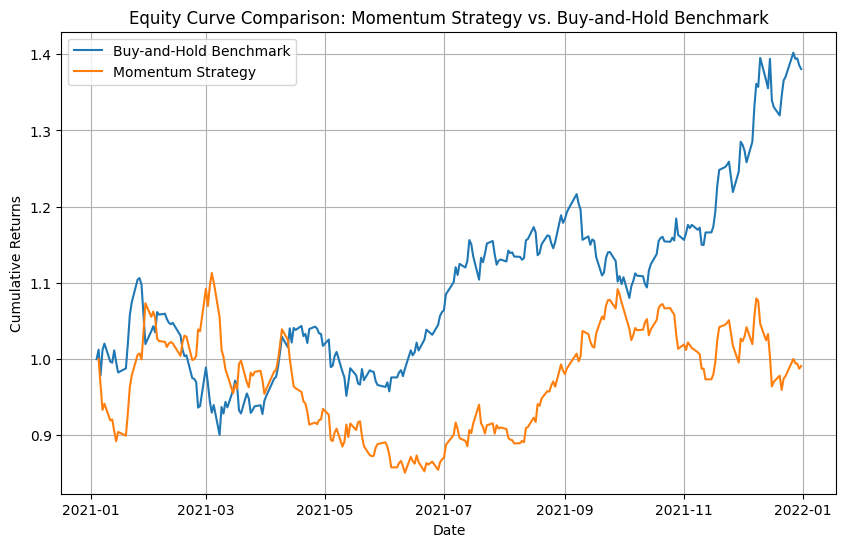

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_stock_data(ticker_symbol, start_date, end_date):
    stock = yf.Ticker(ticker_symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

def calculate_equity_curve(data):
    data['returns'] = data['Close'].pct_change().fillna(0)
    data['cumulative_returns'] = (1 + data['returns']).cumprod()
    return data

# Fetch data for AAPL
start_date = '2021-01-01'
end_date = '2022-01-01'
ticker_symbol = 'AAPL'
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

# Calculate equity curve for buy-and-hold strategy
benchmark_data = calculate_equity_curve(stock_data.copy())

# Calculate equity curve for momentum strategy
momentum_data = stock_data.copy()
momentum_data['momentum'] = momentum_data['Close'].pct_change().fillna(0)
momentum_data['position'] = np.where(momentum_data['momentum'] > 0, 1, np.where(momentum_data['momentum'] < 0, -1, 0))
momentum_data['returns'] = momentum_data['position'].shift(1) * momentum_data['Close'].pct_change()
momentum_data['cumulative_returns'] = (1 + momentum_data['returns']).cumprod()

# Plot equity curves
plt.figure(figsize=(10, 6))
plt.plot(benchmark_data.index, benchmark_data['cumulative_returns'], label='Buy-and-Hold Benchmark')
plt.plot(momentum_data.index, momentum_data['cumulative_returns'], label='Momentum Strategy')
plt.title('Equity Curve Comparison: Momentum Strategy vs. Buy-and-Hold Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


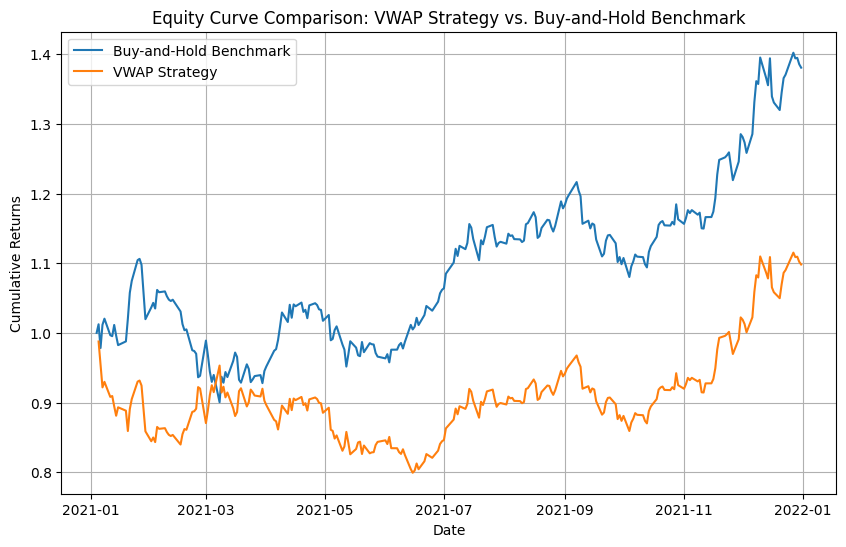

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_stock_data(ticker_symbol, start_date, end_date):
    stock = yf.Ticker(ticker_symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

def calculate_vwap(data):
    data['vwap'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()
    return data

def generate_trading_signals(data):
    data['position'] = np.where(data['Close'] > data['vwap'], 1, -1)
    return data

def calculate_equity_curve(data):
    data['returns'] = data['position'].shift(1) * data['Close'].pct_change().fillna(0)
    data['cumulative_returns'] = (1 + data['returns']).cumprod()
    return data

# Fetch data for AAPL
start_date = '2021-01-01'
end_date = '2022-01-01'
ticker_symbol = 'AAPL'
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

# Calculate VWAP
stock_data = calculate_vwap(stock_data)

# Generate trading signals based on VWAP
stock_data = generate_trading_signals(stock_data)

# Calculate equity curve for VWAP strategy
vwap_data = calculate_equity_curve(stock_data)

# Calculate equity curve for buy-and-hold benchmark
benchmark_data = fetch_stock_data(ticker_symbol, start_date, end_date)
benchmark_data['returns'] = benchmark_data['Close'].pct_change().fillna(0)
benchmark_data['cumulative_returns'] = (1 + benchmark_data['returns']).cumprod()

# Plot equity curves
plt.figure(figsize=(10, 6))
plt.plot(benchmark_data.index, benchmark_data['cumulative_returns'], label='Buy-and-Hold Benchmark')
plt.plot(vwap_data.index, vwap_data['cumulative_returns'], label='VWAP Strategy')
plt.title('Equity Curve Comparison: VWAP Strategy vs. Buy-and-Hold Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install FinQuant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 545.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


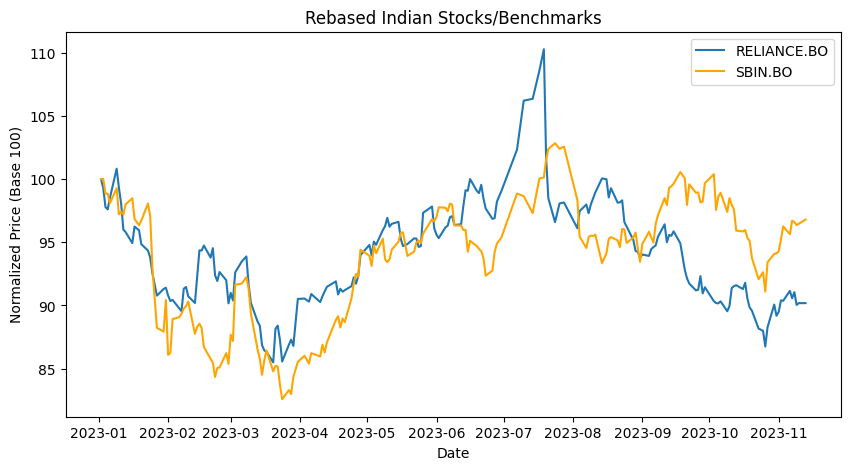

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbols for Indian stocks or benchmarks
ticker_symbol_1 = 'RELIANCE.BO'  # Example: Reliance Industries Ltd. (RELIANCE.BO)
ticker_symbol_2 = 'SBIN.BO'      # Example: State Bank of India (SBIN.BO)

# Download data for Indian stocks or benchmarks from Yahoo Finance
data_1 = yf.download(ticker_symbol_1, start='2023-01-01', end='2023-11-15')
data_2 = yf.download(ticker_symbol_2, start='2023-01-01', end='2023-11-15')

# Calculate normalized prices based on the first available price
normalized_1 = data_1['Adj Close'] / data_1['Adj Close'].iloc[0] * 100
normalized_2 = data_2['Adj Close'] / data_2['Adj Close'].iloc[0] * 100

# Plotting the normalized prices on the same plot
plt.figure(figsize=(10, 5))
plt.plot(normalized_1, label=ticker_symbol_1)
plt.plot(normalized_2, label=ticker_symbol_2, color='orange')
plt.title('Rebased Indian Stocks/Benchmarks')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend()
plt.show()


In [ ]:
import datetime
import pandas as pd
from finquant.portfolio import build_portfolio

d = {

    1: {"Name": "NLY", "Allocation": 20},
    2: {"Name": "LVS", "Allocation": 20},
    3: {"Name": "FXAIX", "Allocation": 20},
    4: {"Name": "PG", "Allocation": 20},
    5: {"Name": "CAT", "Allocation": 15},
    6: {"Name": "HPP", "Allocation": 5},
}

pf_allocation = pd.DataFrame.from_dict(d, orient="index")

names = pf_allocation["Name"].values.tolist()
start_date = datetime.datetime(2020, 1, 1)
end_date = "2023-11-01"
market_index = "^GSPC"

pf = build_portfolio(
    names=names,
    pf_allocation=pf_allocation,
    start_date=start_date,
    end_date=end_date,
    data_api="yfinance",
    market_index=market_index,
)

print(pf.portfolio)
print(pf.data.head(3))
print(pf)
pf.properties()

[*********************100%%**********************]  6 of 6 completed
[*********************100%%**********************]  1 of 1 completed


    Name Allocation
0    NLY       20.0
1    LVS       20.0
2  FXAIX       20.0
3     PG       20.0
4    CAT       15.0
5    HPP        5.0
                  NLY        LVS       FXAIX          PG         CAT  \
Date                                                                   
2020-01-02  21.784441  68.619362  105.926315  111.094986  136.412842   
2020-01-03  21.669544  67.572632  105.185638  110.347824  134.518814   
2020-01-06  21.738485  67.931236  105.560661  110.500862  134.428223   

                  HPP  
Date                   
2020-01-02  29.735699  
2020-01-03  29.832165  
2020-01-06  29.800005  
Contains information about a portfolio.
----------------------------------------------------------------------
Stocks: NLY, LVS, FXAIX, PG, CAT, HPP
Market Index: ^GSPC
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.051
Portfolio Volatility: 0.256
Portfolio Downside Risk: 0.224
Portfolio Value at Risk: 47.167
Confidence level of Value at Risk: 95

In [ ]:
pf.properties()


----------------------------------------------------------------------
Stocks: NLY, LVS, FXAIX, PG, CAT, HPP
Market Index: ^GSPC
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.051
Portfolio Volatility: 0.256
Portfolio Downside Risk: 0.224
Portfolio Value at Risk: 47.167
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: 0.180
Portfolio Sortino Ratio: 0.206
Portfolio Treynor Ratio: 0.049
Portfolio Beta: 0.940
Portfolio R squared: -0.505

Skewness:
        NLY       LVS     FXAIX        PG       CAT       HPP
0 -0.168521  0.149271 -0.793097 -0.458313 -0.290625 -0.387984

Kurtosis:
        NLY       LVS    FXAIX        PG       CAT       HPP
0 -0.695804 -0.961446 -0.14907 -0.489833 -0.465446 -1.083069

Information:
    Name Allocation
0    NLY       20.0
1    LVS       20.0
2  FXAIX       20.0
3     PG       20.0
4    CAT       15.0
5    HPP        5.0
----------------------------------------------------------------------


NLY     -0.026562
LVS      0.020449
FXAIX    0.109648
PG       0.101932
CAT      0.189605
HPP     -0.368274
dtype: float64
                 NLY       LVS     FXAIX        PG       CAT       HPP
Date                                                                  
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-03 -0.005274 -0.015254 -0.006992 -0.006725 -0.013885  0.003244
2020-01-06 -0.002110 -0.010028 -0.003452 -0.005348 -0.014549  0.002163
                 NLY       LVS     FXAIX        PG       CAT       HPP
Date                                                                  
2020-01-03 -0.005288 -0.015372 -0.007017 -0.006748 -0.013982  0.003239
2020-01-06  0.003176  0.005293  0.003559  0.001386 -0.000674 -0.001079
2020-01-07  0.006322  0.000998 -0.002668 -0.006211 -0.013301 -0.026515


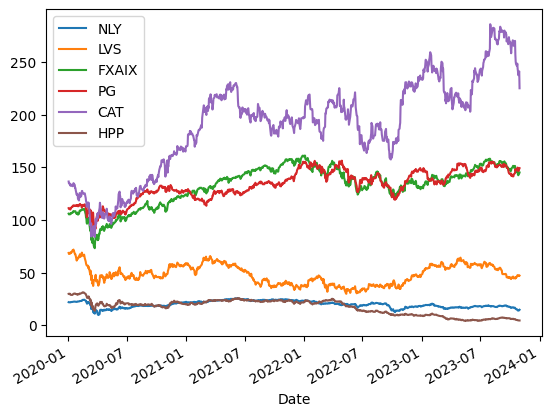

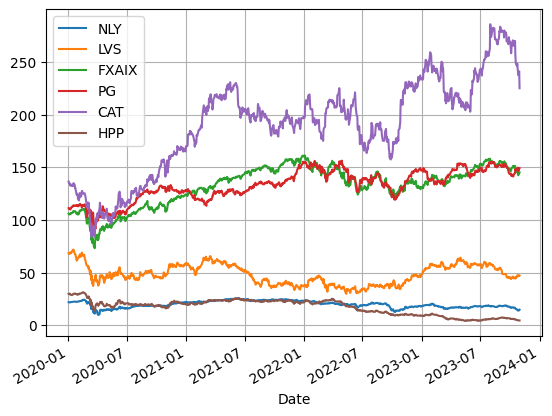

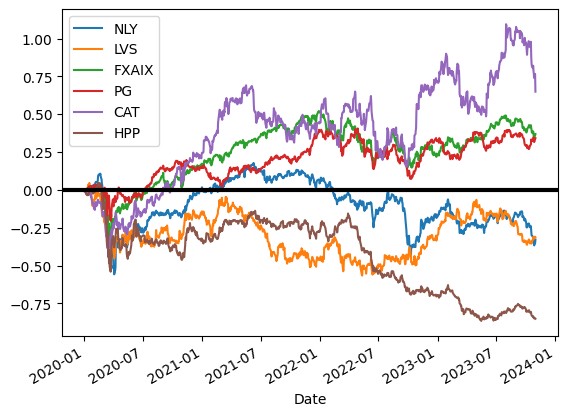

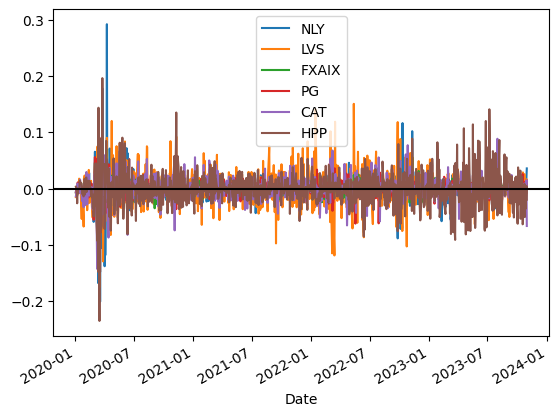

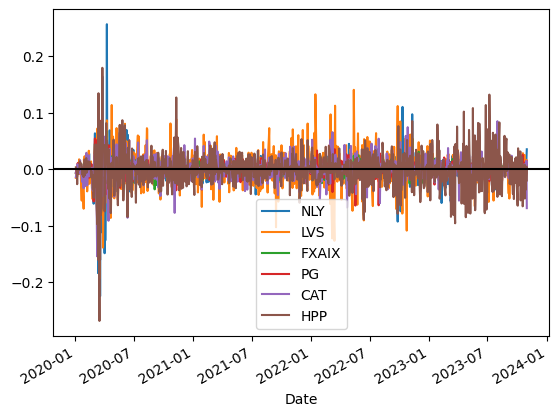

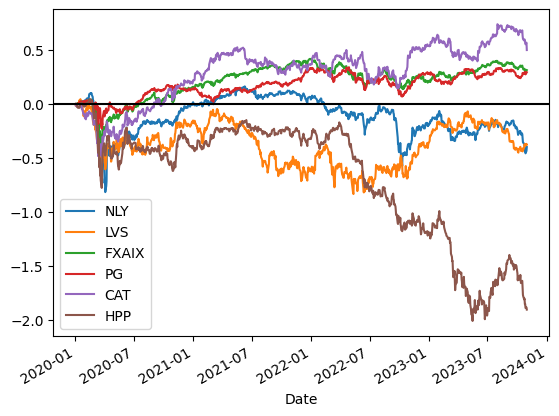

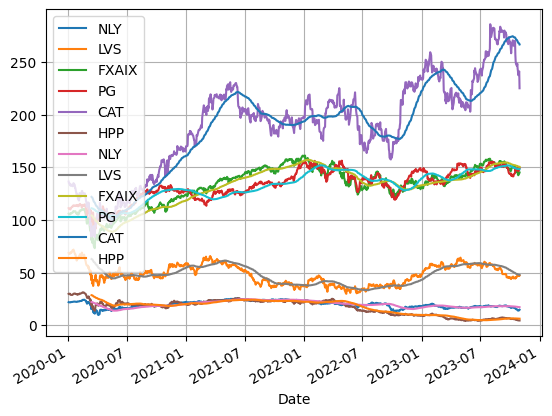

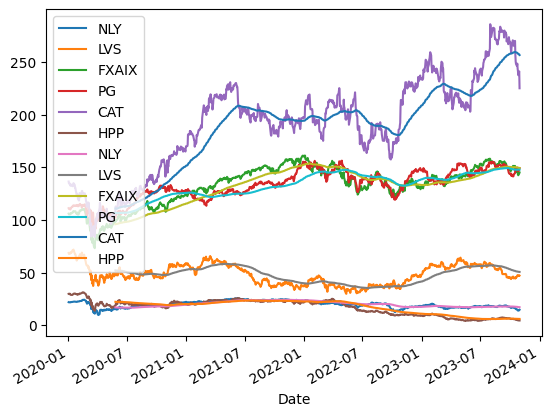

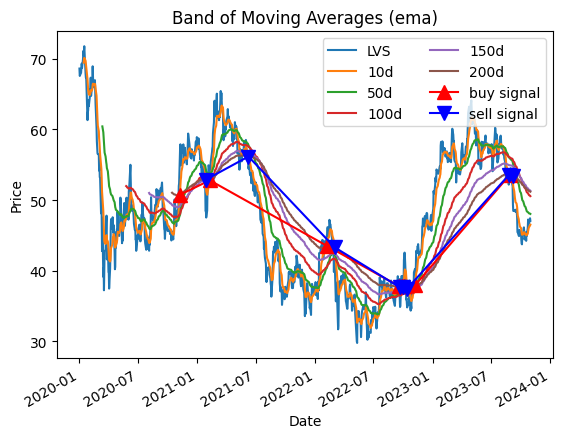

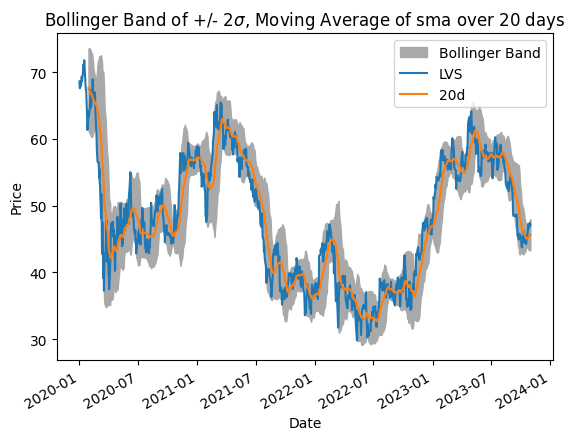

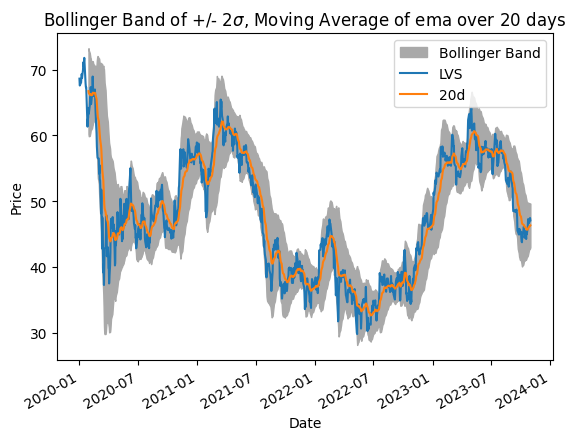

For 100 trading days and a risk-free rate of 0.02:
Expected return: 0.020
Volatility: 0.161
Sharpe Ratio: 0.002
----------------------------------------------------------------------
Stocks: NLY, LVS, FXAIX, PG, CAT, HPP
Market Index: ^GSPC
Time window/frequency: 100
Risk free rate: 0.02
Portfolio Expected Return: 0.020
Portfolio Volatility: 0.161
Portfolio Downside Risk: 0.250
Portfolio Value at Risk: 28.521
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: 0.002
Portfolio Sortino Ratio: 0.001
Portfolio Treynor Ratio: 0.000
Portfolio Beta: 0.940
Portfolio R squared: -0.505

Skewness:
        NLY       LVS     FXAIX        PG       CAT       HPP
0 -0.168521  0.149271 -0.793097 -0.458313 -0.290625 -0.387984

Kurtosis:
        NLY       LVS    FXAIX        PG       CAT       HPP
0 -0.695804 -0.961446 -0.14907 -0.489833 -0.465446 -1.083069

Information:
    Name Allocation
0    NLY       20.0
1    LVS       20.0
2  FXAIX       20.0
3     PG       20.0
4    CAT       15.0


In [ ]:
import datetime
import matplotlib.pyplot as plt
from finquant.moving_average import sma, ema, compute_ma, plot_bollinger_band

# Annualized mean returns
print(pf.comp_mean_returns())

# Daily returns (percentage change)
print(pf.comp_cumulative_returns().head(3))
print(pf.comp_daily_log_returns().head(3))

# Plotting stock data of the portfolio
pf.data.plot()
plt.show()

# Plotting with a secondary y-axis for better visualization
pf.data.plot(secondary_y=["WIKI/NLY", "WIKI/LVS"], grid=True)
plt.show()

# Plotting cumulative returns
pf.comp_cumulative_returns().plot().axhline(y=0, color="black", lw=3)
plt.show()

# Plotting daily percentage changes of returns
pf.comp_daily_returns().plot().axhline(y=0, color="black")
plt.show()

# Plotting daily log returns
pf.comp_daily_log_returns().plot().axhline(y=0, color="black")
plt.show()

# Plotting cumulative log returns
pf.comp_daily_log_returns().cumsum().plot().axhline(y=0, color="black")
plt.show()

# Moving Averages

# Simple Moving Average
ax = pf.data.plot(secondary_y=["WIKI/NLY", "WIKI/LVS"], grid=True)
sma(pf.data, span=50).plot(ax=ax, secondary_y=["WIKI/NLY", "WIKI/LVS"], grid=True)
plt.show()

# Exponential Moving Average
ax = pf.data.plot(secondary_y=["WIKI/NLY", "WIKI/LVS"], grid=True)
ema(pf.data).plot(ax=ax, secondary_y=["WIKI/NLY", "WIKI/LVS"])
plt.show()

# Band of moving averages and Buy/Sell signals
spans = [10, 50, 100, 150, 200]

# Replace 'WIKI/LVS' with the correct Yahoo Finance symbol for Las Vegas Sands Corp.
lvs_symbol = "LVS"

# Retrieve the correct stock data for LVS
lvs = pf.get_stock(lvs_symbol).data.copy(deep=True)
compute_ma(lvs, ema, spans, plot=True)
plt.show()

# Plot the Bollinger Band of one stock
span = 20

# For simple moving average:
plot_bollinger_band(lvs, sma, span)
plt.show()

# For exponential moving average:
plot_bollinger_band(lvs, ema, span)
plt.show()

# Recomputing expected return, volatility, and Sharpe ratio
pf.freq = 100
pf.risk_free_rate = 0.02
exret = pf.comp_expected_return(freq=100)
vol = pf.comp_volatility(freq=100)
sharpe = pf.comp_sharpe()
print(f"For {pf.freq} trading days and a risk-free rate of {pf.risk_free_rate}:")
print(f"Expected return: {exret:.3f}")
print(f"Volatility: {vol:.3f}")
print(f"Sharpe Ratio: {sharpe:.3f}")

# Portfolio properties
pf.properties()

# Extracting data of stocks individually
lvs = pf.get_stock("LVS")
print(lvs.data.head(3))
print(lvs.comp_daily_returns().head(3))
print(lvs.expected_return)
print(lvs.volatility)
print(lvs.skew)
print(lvs.kurtosis)
print(lvs)
lvs.properties()

# Extracting stock data by date
print(pf.data.loc[str(datetime.datetime(2020, 1, 2))])
print(pf.data.loc[pf.data.index > datetime.datetime(2021, 1, 2)].head(3))
print(pf.data.loc[pf.data.index.year == 2022].head(3))